In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_df = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')

In [3]:
#removing the Id column
train_df = train_df.drop('Id', 1)
train_df.columns[0:78]

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [4]:
#First let's split our data into training and test datasets
train = train_df[0:1190]
test = train_df[1191:]
train.shape

(1190, 80)

We will use following approaches to find the best model

**1. Linear Regression on just the numerical features**

**2. Linear Regression on the entire Feature Space (after binarization of the feature space)**

**3. Linear Regression after feature scaling and selection**

**4. Other Approaches for prediction improvement**

First we will find the linear regression output on just the numerical fields

In [5]:
#Now we will build and evaluate our first model, using only numerical values from the dataset
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.metrics import mean_squared_log_error
import math

def transform_x_and_y(df):
    df_x = df[df.columns[0:78]]
    df_y = df.iloc[:,-1]
    
    return df_x, df_y

def get_numerical_fields(df):
    df = df[['LotFrontage', 'LotArea', 'MasVnrArea', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea']]
    
    df = df.fillna(0)
    df = preprocessing.StandardScaler().fit(df).transform(df)
    
    return df

train_x, train_y = transform_x_and_y(train)
test_x, test_y = transform_x_and_y(test)

train_x = get_numerical_fields(train_x)
test_x = get_numerical_fields(test_x)

regressor = linear_model.LinearRegression()
regressor.fit(train_x, train_y)

test_y_hat = regressor.predict(test_x)

print('Root Mean Squared Log Error of this (Linear Regression) model is: ', math.sqrt(mean_squared_log_error(test_y, test_y_hat)))


Root Mean Squared Log Error of this (Linear Regression) model is:  0.23186336594168902


Since the Root Mean Squared Error is not very low, it shows that the prices are also heavily affected by some of the categorical values. We'll incorporate all categorical features into our training data next, and compute linear regression prediction on the entire input feature space, post binarization of fields

In [6]:
#Performing binarization/one-hot-encoding on the entire dataset, we get the combined model as
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.metrics import mean_squared_log_error
import math

def transform_x_and_y(df):
    df_y = df['SalePrice']
    df_x = df.drop('SalePrice', axis=1)
    
    return df_x, df_y

set_x, set_y = transform_x_and_y(train_df)

set_x = set_x.fillna(0)
set_x_encoded = pd.get_dummies(set_x)

train_x = set_x_encoded[0:1000]
test_x = set_x_encoded[1001:]

train_y = set_y[0:1000]
test_y = set_y[1001:]

regressor = linear_model.LinearRegression()
regressor.fit(train_x, train_y)

test_y_predicted = regressor.predict(test_x)

print('Root Mean Squared Log Error is:', np.sqrt(mean_squared_log_error(test_y, test_y_predicted)))

Root Mean Squared Log Error is: 0.15908652299463502


Though the score has improved, we can still improve it further by selecting high impact features, removing redundant and non-correlated features, and then apply regression on the specialized feature space.

Lets proceed to do some Exploratory Data Analysis followed by selective Feature Engineering

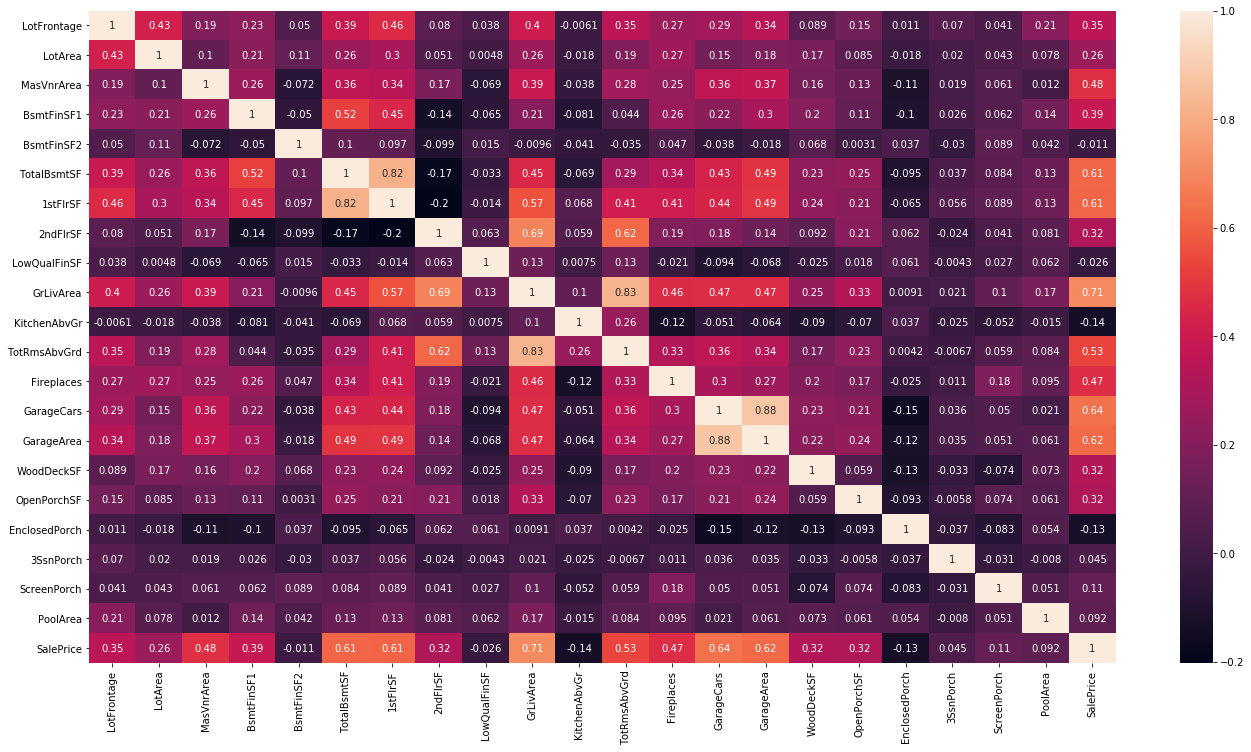

In [23]:
#Let's first check the correlation between the numeric fields, so we can remove highly correlated fields from our dataset
train_numeric = train_df[['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'SalePrice']]
corr_matrix = train_numeric.corr()
plt.figure(figsize=(23,12))
sns.heatmap(corr_matrix, annot=True)

Zooming in, we see that

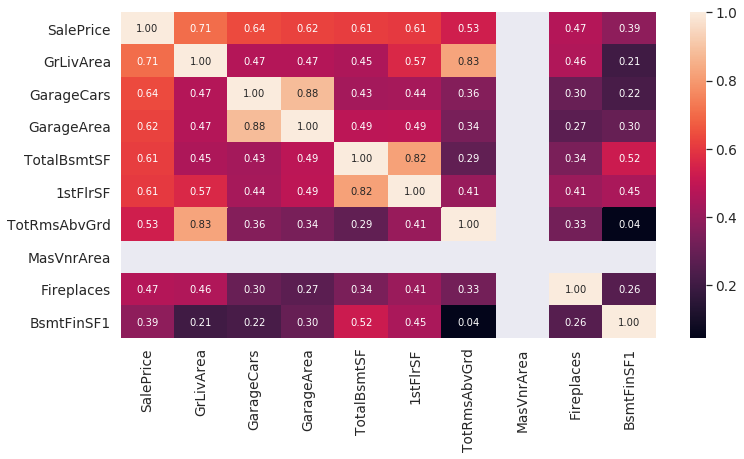

In [30]:
k = 10 #number of variables for heatmap
cols = corr_matrix.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train_numeric[cols].values.T)
sns.set(font_scale=1.25)
plt.figure(figsize=(12,6))
sns.heatmap(cm, cbar=True, annot=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)

From this correlation matrix heatmap, we can see that - 
1. Sale Price is highly correlated to - GrLivArea, TotalBsmtSF, GarageCars, GarageArea, 1stFlrSF, TotRmsAbvGrd
2. TotalRmsAbvGrd and GrLivArea are highly correlated
3. TotalBsmtSF and 1stFlrSF are highly correlated
4. GarageCars and GarageArea are highly correlated

Lets plot a pairplot for a detailed view

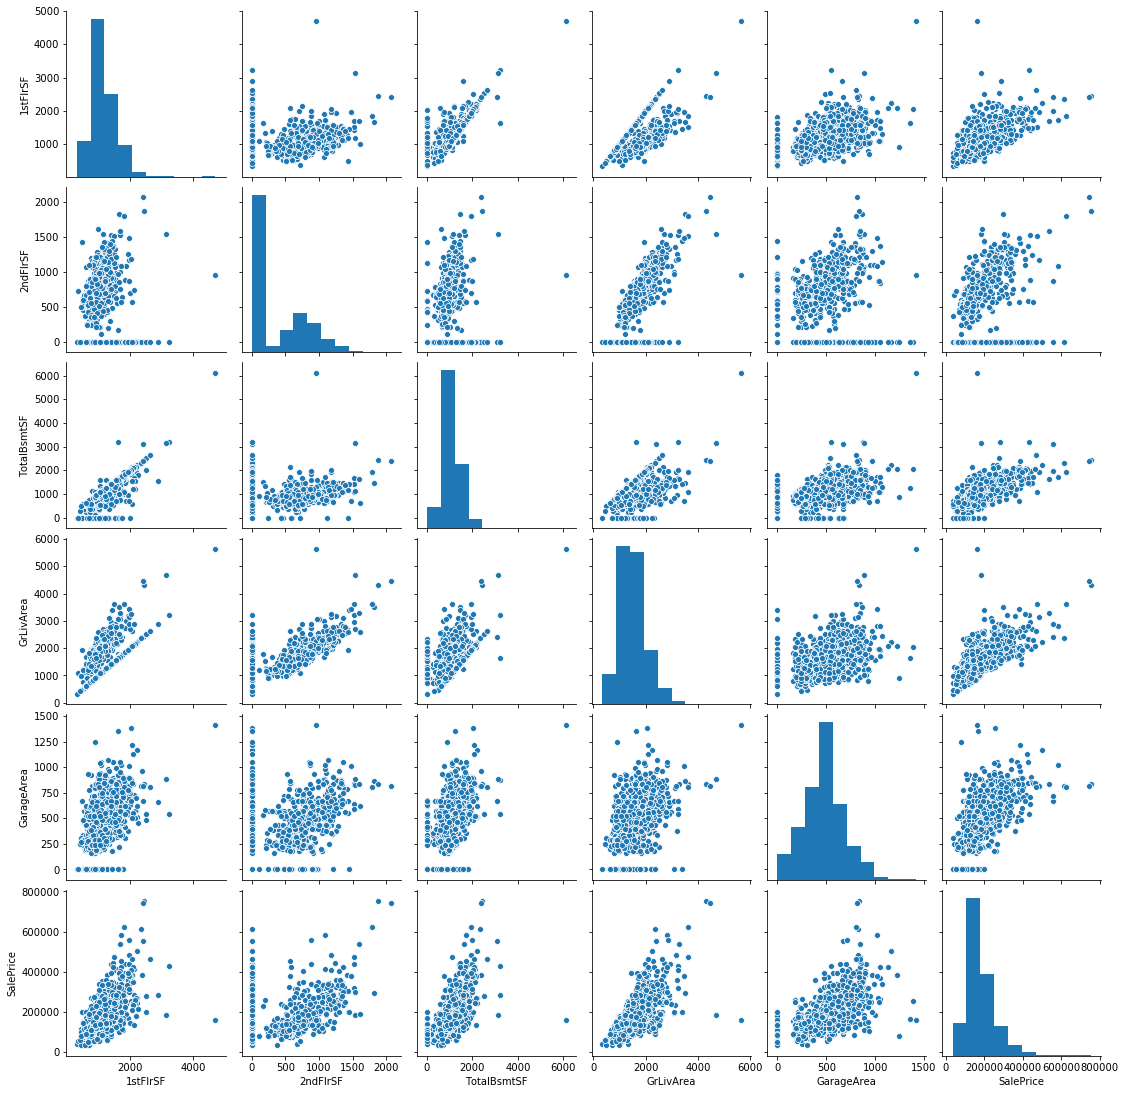

In [8]:
train_numeric = train_df[['1stFlrSF', '2ndFlrSF', 'TotalBsmtSF', 'GrLivArea', 'GarageArea', 'SalePrice']]

sns.pairplot(train_numeric)

In [9]:
#Now, to compare the categorical variables - 
train_nonnumeric = train_df.select_dtypes(exclude=['float64', 'int'])
train_nonnumeric.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

The categorical fields include - 
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition']
       
Lets look at the distribution of each of these fields w.r.t. Sale Price

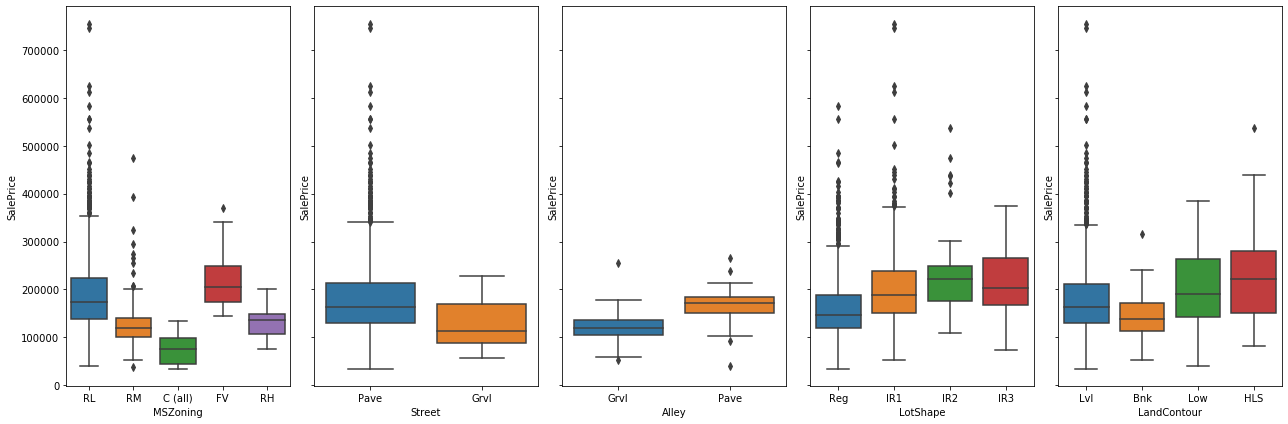

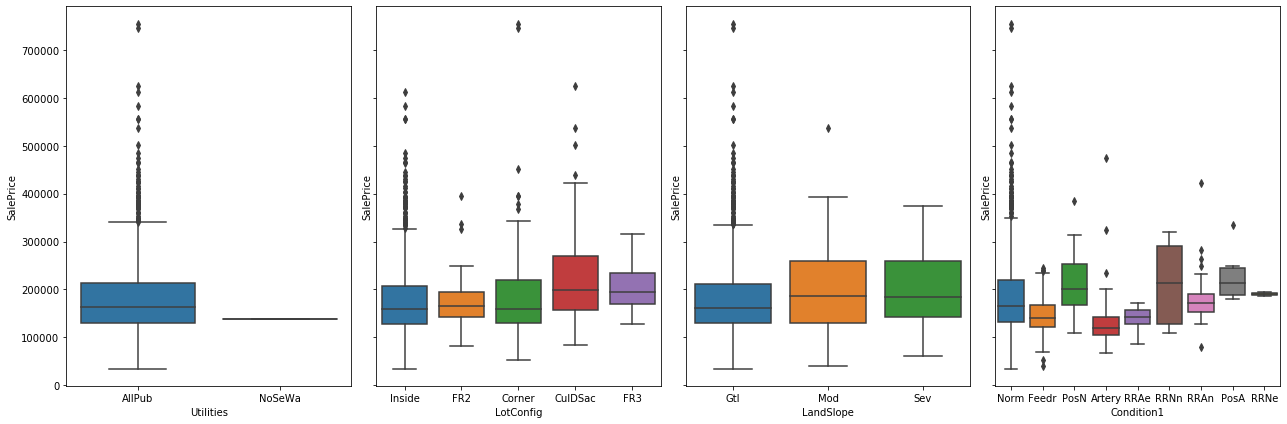

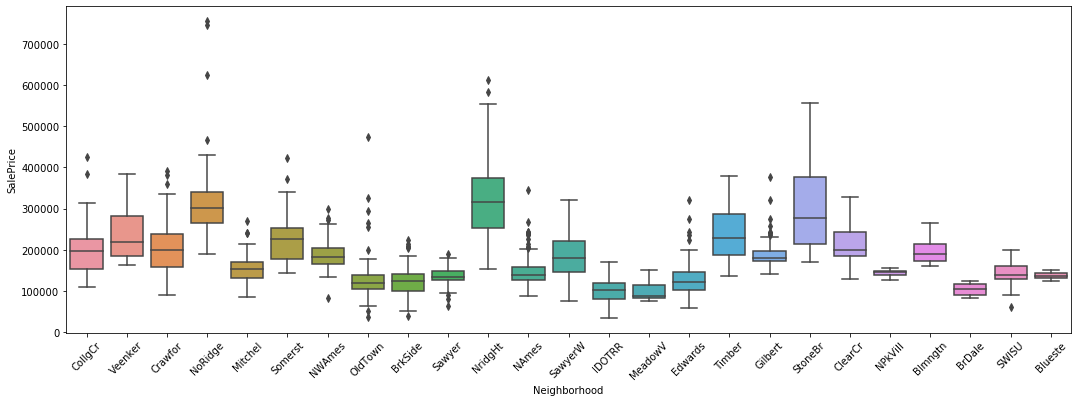

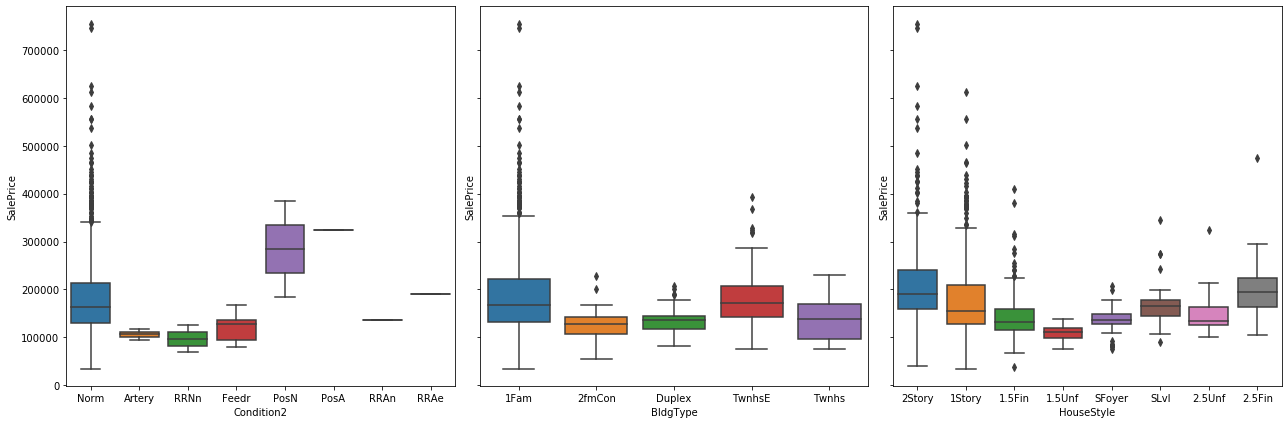

In [10]:
featureset1 = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour']
featureset2 = ['Utilities', 'LotConfig', 'LandSlope','Condition1']
featureset3 = ['Condition2', 'BldgType', 'HouseStyle']

fig1, axes1 = plt.subplots(nrows=1, ncols=5, figsize=(18,6), sharey=True)
for idx,feat in enumerate(train_nonnumeric[featureset1]):
    ax = axes1[idx%5]
    sns.boxplot(x=feat, y='SalePrice', data=train_df, ax=ax)
    ax.set_xlabel(feat)
    ax.set_ylabel('SalePrice')
fig1.tight_layout()

fig2, axes2 = plt.subplots(nrows=1, ncols=4, figsize=(18,6), sharey=True)
for idx,feat in enumerate(train_nonnumeric[featureset2]):
    ax = axes2[idx%4]
    sns.boxplot(x=feat, y='SalePrice', data=train_df, ax=ax)
    ax.set_xlabel(feat)
    ax.set_ylabel('SalePrice')
fig2.tight_layout()

plt.figure(figsize=(18,6))
axes = sns.boxplot(x='Neighborhood', y='SalePrice', data=train_df)
axes.set_xticklabels(axes.get_xticklabels(), rotation=45)

fig3, axes3 = plt.subplots(nrows=1, ncols=3, figsize=(18,6), sharey=True)
for idx,feat in enumerate(train_nonnumeric[featureset3]):
    ax = axes3[idx%3]
    sns.boxplot(x=feat, y='SalePrice', data=train_df, ax=ax)
    ax.set_xlabel(feat)
    ax.set_ylabel('SalePrice')
fig3.tight_layout()

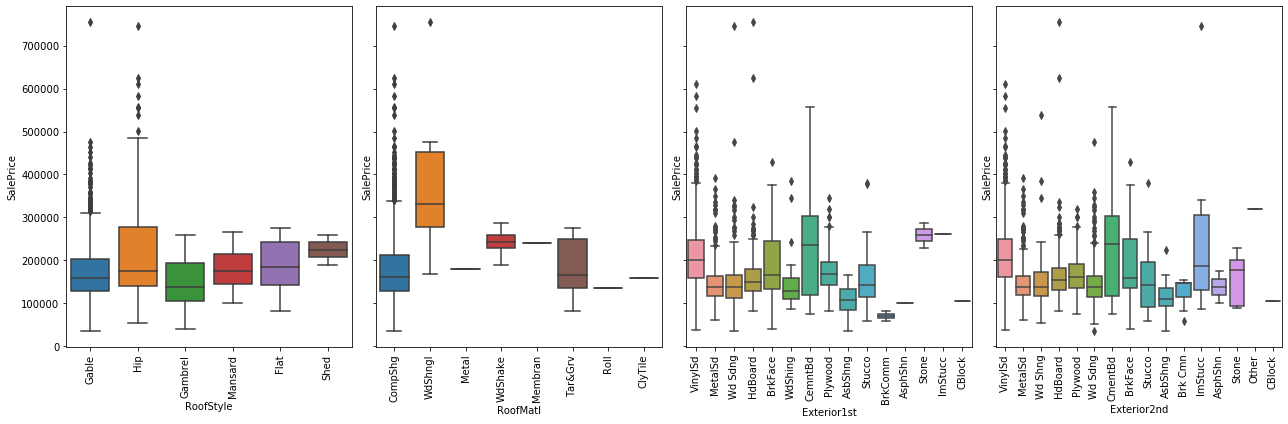

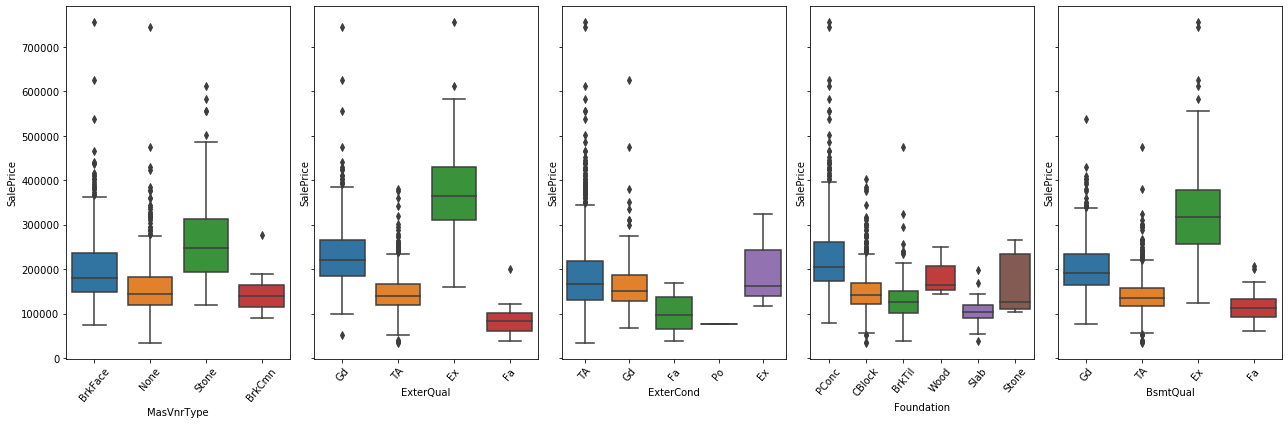

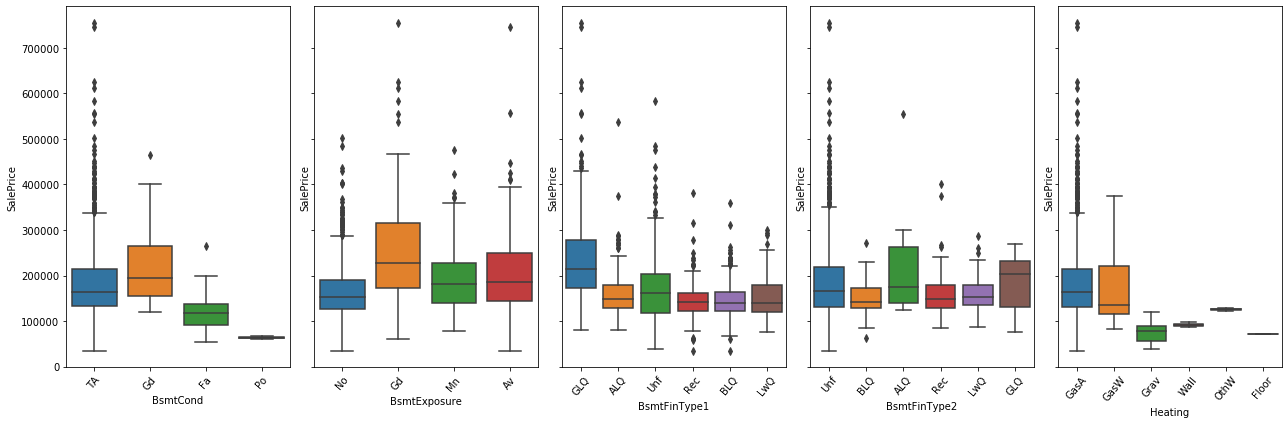

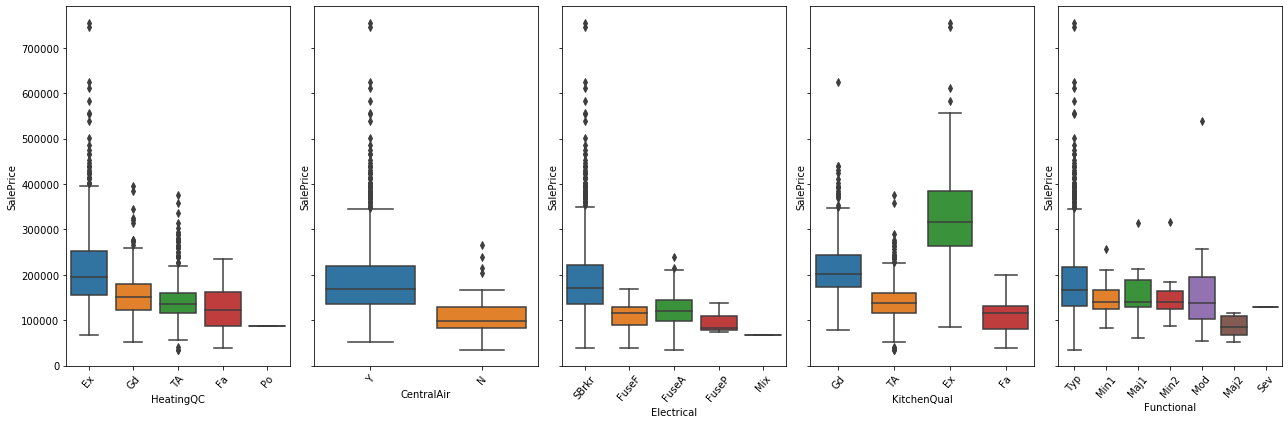

In [11]:
featureset4 = ['RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd']
featureset5 = ['MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual']
featureset6 = ['BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating']
featureset7 = ['HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional']

fig4, axes4 = plt.subplots(nrows=1, ncols=4, figsize=(18,6), sharey=True)
for idx,feat in enumerate(train_nonnumeric[featureset4]):
    ax = axes4[idx%4]
    sns.boxplot(x=feat, y='SalePrice', data=train_df, ax=ax)
    ax.set_xlabel(feat)
    ax.set_ylabel('SalePrice')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
fig4.tight_layout()

fig5, axes5 = plt.subplots(nrows=1, ncols=5, figsize=(18,6), sharey=True)
for idx,feat in enumerate(train_nonnumeric[featureset5]):
    ax = axes5[idx%5]
    sns.boxplot(x=feat, y='SalePrice', data=train_df, ax=ax)
    ax.set_xlabel(feat)
    ax.set_ylabel('SalePrice')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=50)
fig5.tight_layout()

fig6, axes6 = plt.subplots(nrows=1, ncols=5, figsize=(18,6), sharey=True)
for idx,feat in enumerate(train_nonnumeric[featureset6]):
    ax = axes6[idx%5]
    sns.boxplot(x=feat, y='SalePrice', data=train_df, ax=ax)
    ax.set_xlabel(feat)
    ax.set_ylabel('SalePrice')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=50)
fig6.tight_layout()

fig7, axes7 = plt.subplots(nrows=1, ncols=5, figsize=(18,6), sharey=True)
for idx,feat in enumerate(train_nonnumeric[featureset7]):
    ax = axes7[idx%5]
    sns.boxplot(x=feat, y='SalePrice', data=train_df, ax=ax)
    ax.set_xlabel(feat)
    ax.set_ylabel('SalePrice')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=50)
fig7.tight_layout()

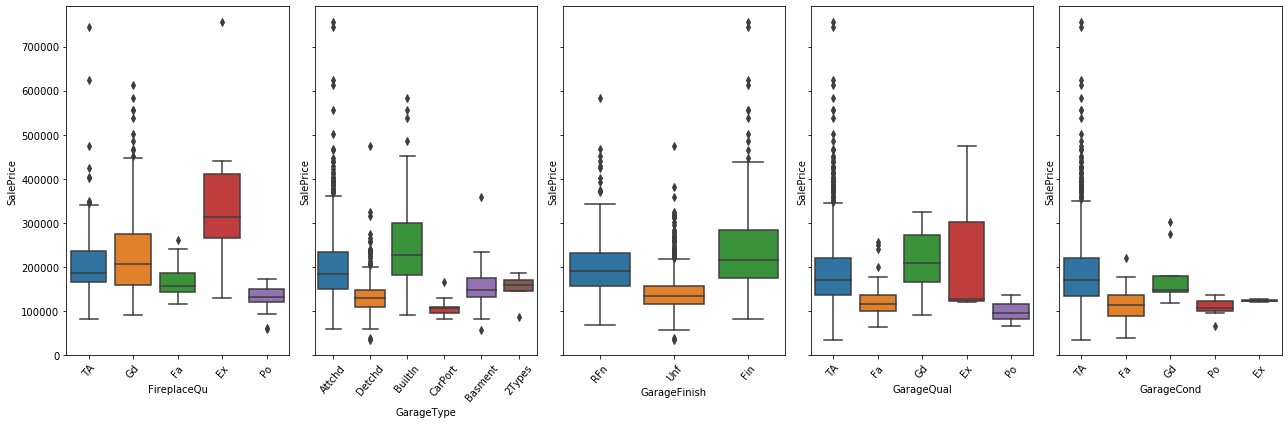

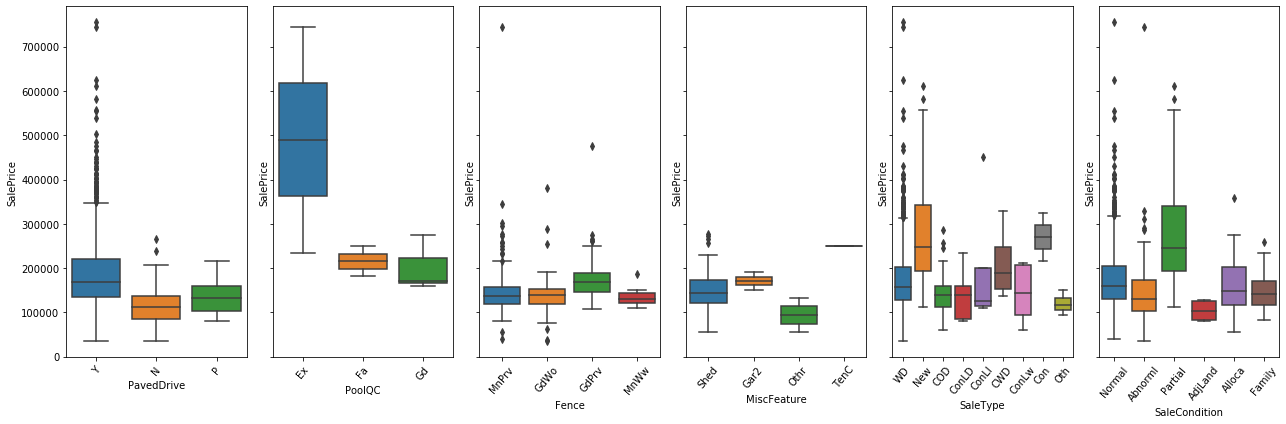

In [12]:
featureset8 = ['FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
featureset9 = ['PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']

fig8, axes8 = plt.subplots(nrows=1, ncols=5, figsize=(18,6), sharey=True)
for idx,feat in enumerate(train_nonnumeric[featureset8]):
    ax = axes8[idx%5]
    sns.boxplot(x=feat, y='SalePrice', data=train_df, ax=ax)
    ax.set_xlabel(feat)
    ax.set_ylabel('SalePrice')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=50)
fig8.tight_layout()

fig9, axes9 = plt.subplots(nrows=1, ncols=6, figsize=(18,6), sharey=True)
for idx,feat in enumerate(train_nonnumeric[featureset9]):
    ax = axes9[idx%6]
    sns.boxplot(x=feat, y='SalePrice', data=train_df, ax=ax)
    ax.set_xlabel(feat)
    ax.set_ylabel('SalePrice')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=50)
fig9.tight_layout()

By looking at the spread, we have selected below categorical variables as high impact and necessary for more precise prediction - 
['MSZoning', 'Alley', 'Utilities', 'ExterQual', 'BsmtQual', 'CentralAir', 'KitchenQual', 'MiscFeature']

Now Checking the Ordinal fields

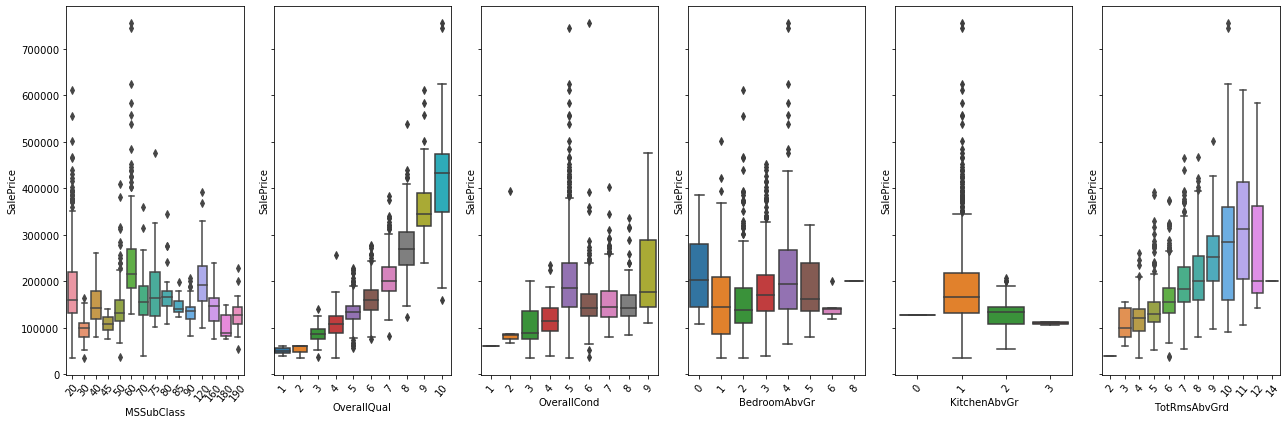

In [13]:
featureset = ['MSSubClass', 'OverallQual', 'OverallCond', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd']
fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(18,6), sharey=True)
for idx,feat in enumerate(train_df[featureset]):
    ax = axes[idx%6]
    sns.boxplot(x=feat, y='SalePrice', data=train_df, ax=ax)
    ax.set_xlabel(feat)
    ax.set_ylabel('SalePrice')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=50)
fig.tight_layout()

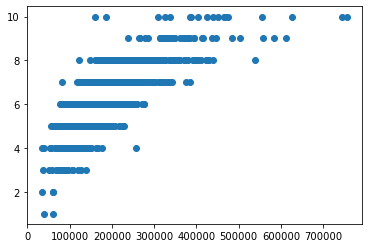

In [14]:
plt.scatter(train_df['SalePrice'], train_df['OverallQual'])

In [15]:
#Combining the selected numerical and categorical features - 

train_df['TotalSF'] = train_df['TotalBsmtSF'] + train_df['1stFlrSF'] + train_df['2ndFlrSF']

train_selective_final = train_df[['MSZoning', 'LandSlope', 'LotShape', 'Utilities', 'PavedDrive', 'ExterQual', 'BsmtQual', 'CentralAir', 'KitchenQual', 'TotalBsmtSF', 'GarageArea', 'GrLivArea', 'TotalSF', 'Foundation', 'GarageQual', 'GarageCond', 'GarageFinish', 'BldgType', 'HouseStyle', 'LotConfig', 'Neighborhood', 'SalePrice']]

#Binarizing this selective dataset
train_final_encoded = pd.get_dummies(train_selective_final)
train_final_encoded.head()

,TotalBsmtSF,GarageArea,GrLivArea,TotalSF,SalePrice,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,856,548,1710,2566,208500,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1262,460,1262,2524,181500,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,920,608,1786,2706,223500,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,756,642,1717,2473,140000,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1145,836,2198,3343,250000,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0


Now we have the selective, feature scaled dataset ready. We will perform Linear Regression on this and check our RMSLE

In [16]:
#Readying the data for training

train_final_encoded = train_final_encoded.fillna(0)

def get_x_and_y(df):
    df_y = df['SalePrice']
    df_x = df.drop('SalePrice', axis=1)
    return df_x, df_y

X,Y = get_x_and_y(train_final_encoded)

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

regressor = linear_model.LinearRegression()
regressor.fit(X_train, Y_train)
Y_predicted = regressor.predict(X_test)
print('Root Mean Sqaured Log Error of this model is:', np.sqrt(mean_squared_log_error(Y_test, Y_predicted)))

Root Mean Sqaured Log Error of this model is: 0.1473615859606689


This is a good improvement! This shows that our selection of features and feature engineering was successful at improving the model's prediction.

To improve the model further, we need to try other prediction methodologies.

The first methodology we will try is - **Random Forest Regression**

In [17]:
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
random_forest = RandomForestRegressor(n_estimators = 1000, random_state = 42)
set_x, set_y = transform_x_and_y(train_df)

set_x = set_x.drop(['Condition2', 'Electrical', 'Exterior1st', 'Exterior2nd', 'GarageQual', 'Heating', 'HouseStyle', 'MiscFeature', 'PoolQC', 'RoofMatl', 'Utilities', 'Functional', 'KitchenQual', 'MSZoning', 'SaleType'], 1)
set_x = set_x.fillna(0)
set_x_encoded = pd.get_dummies(set_x)

train_x = set_x_encoded[0:1000]
test_x = set_x_encoded[1001:]

train_y = set_y[0:1000]
test_y = set_y[1001:]

random_forest.fit(train_x, train_y)
Y_predicted = random_forest.predict(test_x)
print('Root Mean Sqaured Log Error of this model is:', np.sqrt(mean_squared_log_error(test_y, Y_predicted)))

Root Mean Sqaured Log Error of this model is: 0.143818931044267


Next we will try predicting the Sale Price using **Extreme Gradient Boosting**

In [18]:
import xgboost as xgb

set_x, set_y = transform_x_and_y(train_df)

set_x = set_x.drop(['Condition2', 'Electrical', 'Exterior1st', 'Exterior2nd', 'GarageQual', 'Heating', 'HouseStyle', 'MiscFeature', 'PoolQC', 'RoofMatl', 'Utilities', 'Functional', 'KitchenQual', 'MSZoning', 'SaleType'], 1)
set_x = set_x.fillna(0)
set_x_encoded = pd.get_dummies(set_x)

train_x = set_x_encoded[0:1000]
test_x = set_x_encoded[1001:]

train_y = set_y[0:1000]
test_y = set_y[1001:]

xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.05,
                max_depth = 4, alpha = 800, n_estimators = 550)

xg_reg.fit(train_x, train_y)
Y_predicted = xg_reg.predict(test_x)
print('Root Mean Sqaured Log Error of XGBoost model is:', np.sqrt(mean_squared_log_error(test_y, Y_predicted)))

Root Mean Sqaured Log Error of XGBoost model is: 0.1181751181827233


The last approach that we will try, is **Light Gradient Boosting**

In [19]:
import lightgbm as lgb

model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=7,
                              learning_rate=0.02, n_estimators=700,
                              max_bin = 70, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.23,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =5, min_sum_hessian_in_leaf = 15)

model_lgb.fit(train_x, train_y)
Y_predicted = model_lgb.predict(test_x)

print('Root Mean Sqaured Log Error of LGB model is:', np.sqrt(mean_squared_log_error(test_y, Y_predicted)))

Root Mean Sqaured Log Error of LGB model is: 0.12613255496573283


Of all tried models, XGBoost applied on the entire binarized feature space gave the best accuracy. We will use that to predict our test data and create the submission file

In [20]:
#Training our regressor on the entire available training set
set_x, set_y = transform_x_and_y(train_df)

set_x = set_x.drop(['Condition2', 'Electrical', 'Exterior1st', 'Exterior2nd', 'GarageQual', 'Heating', 'HouseStyle', 'MiscFeature', 'PoolQC', 'RoofMatl', 'Utilities'], 1)
set_x = set_x.fillna(0)
set_x_encoded = pd.get_dummies(set_x)

xg_reg.fit(set_x_encoded, set_y)


test_df = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')
test_df_Id = test_df['Id']
test_df['TotalSF'] = test_df['TotalBsmtSF'] + test_df['1stFlrSF'] + test_df['2ndFlrSF']
test_df = test_df.drop(['Id', 'Condition2', 'Electrical', 'Exterior1st', 'Exterior2nd', 'GarageQual', 'Heating', 'HouseStyle', 'MiscFeature', 'PoolQC', 'RoofMatl', 'Utilities'], 1)
test_df = test_df.fillna(0)
test_df_encoded = pd.get_dummies(test_df)
test_df_encoded = test_df_encoded.drop(['Functional_0', 'KitchenQual_0', 'MSZoning_0', 'SaleType_0'], 1)

SalePrice = xg_reg.predict(test_df_encoded)

In [21]:
#Creating Submission
submission = pd.DataFrame()
submission['Id'] = test_df_Id
submission['SalePrice'] = SalePrice

submission.to_csv("submission.csv", index=False)
submission

,Id,SalePrice
0,1461,127048.921875
1,1462,162111.984375
2,1463,190392.250000
3,1464,198995.062500
4,1465,183316.828125
...,...,...
1454,2915,82316.937500
1455,2916,76909.414062
1456,2917,150316.125000
1457,2918,118145.570312
